In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix as cm

data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


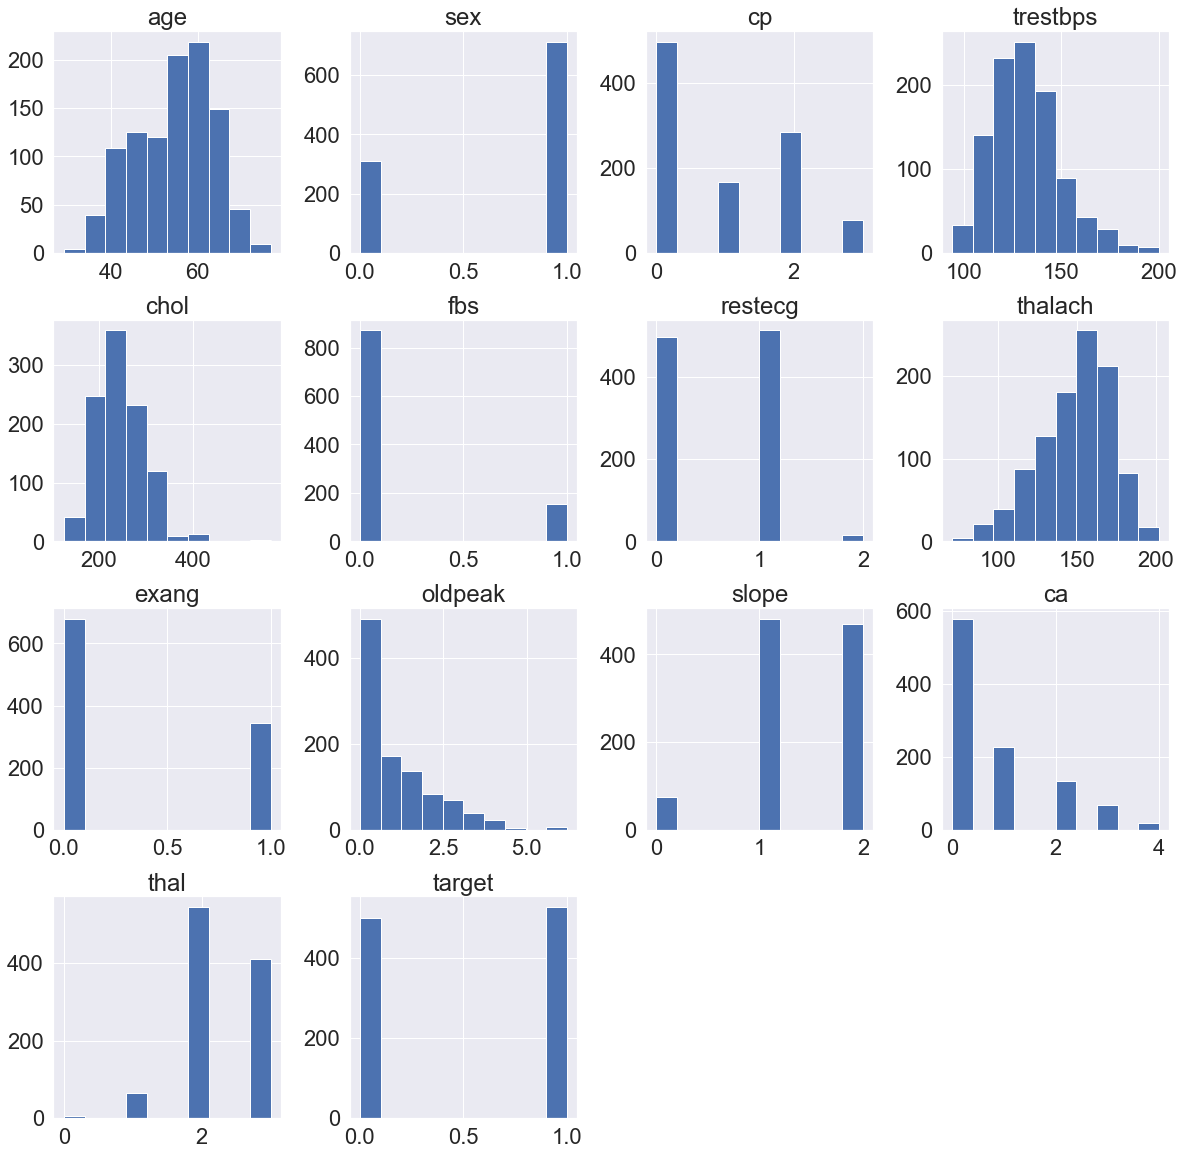

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("heart.csv")
sns.set(font_scale=2)
data.hist(figsize=(20,20))
plt.show()

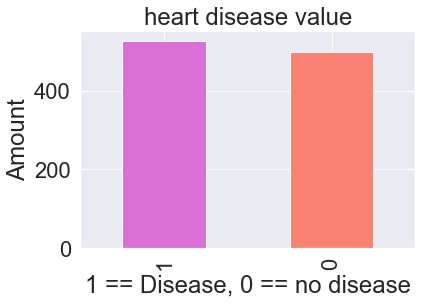

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("heart.csv")

data.target.value_counts().plot(kind = 'bar', color = ['orchid', 'salmon'])
plt.title("heart disease value")
plt.xlabel("1 == Disease, 0 == no disease")
plt.ylabel("Amount")
plt.show()

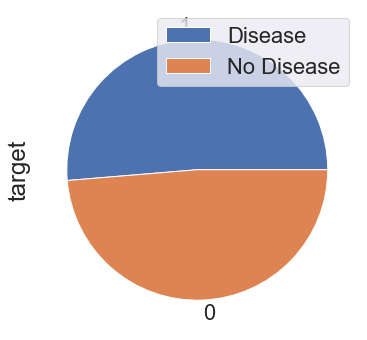

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("heart.csv")
data.target.value_counts().plot(kind = 'pie',figsize = (10, 6))
plt.legend(["Disease", "No Disease"])
plt.show()

In [7]:
data.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

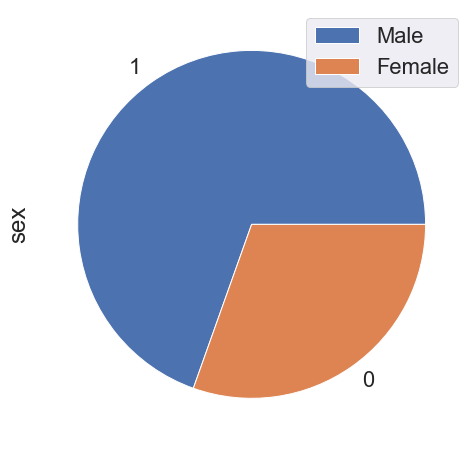

In [8]:
data.sex.value_counts().plot(kind = 'pie', figsize = (10, 8))
plt.legend(['Male', 'Female'])

In [9]:
pd.crosstab(data.sex, data.target)

target,0,1
sex,,
0,86,226
1,413,300


<AxesSubplot:xlabel='target', ylabel='count'>

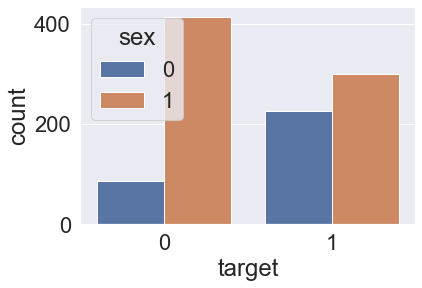

In [10]:
import seaborn as sns
sns.countplot(x = 'target', data = data, hue = 'sex')

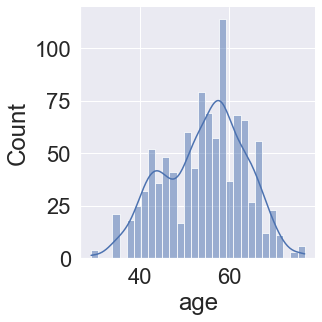

In [11]:
sns.displot(x = 'age', data = data, bins = 30, kde = True)

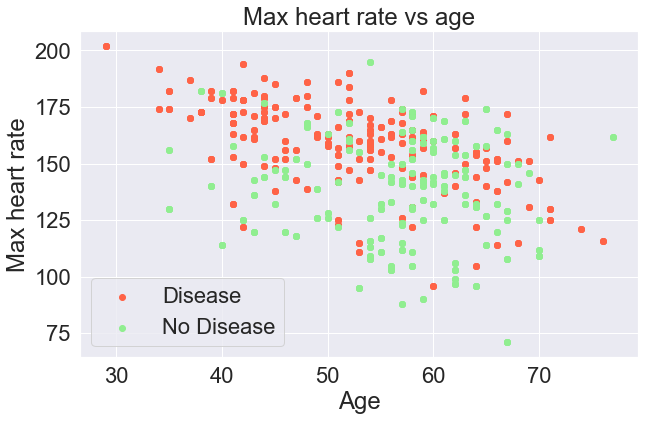

In [12]:
plt.figure(figsize = (10, 6))
plt.scatter(data.age[data.target == 1],
           data.thalach[data.target == 1],
           c = 'tomato')
plt.scatter(data.age[data.target == 0],
           data.thalach[data.target == 0],
           c = 'lightgreen')
plt.title("Max heart rate vs age")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease", "No Disease"])

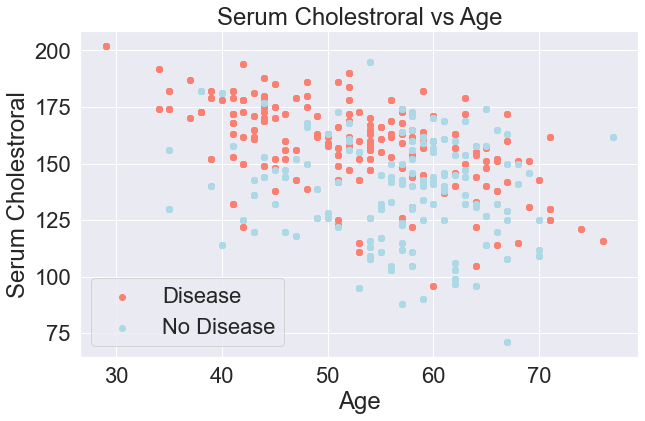

In [13]:
plt.figure(figsize = (10, 6))
plt.scatter(data.age[data.target == 1],
           data.thalach[data.target == 1],
           c = 'salmon')
plt.scatter(data.age[data.target == 0],
           data.thalach[data.target == 0],
           c = 'lightblue')
plt.title("Serum Cholestroral vs Age")
plt.xlabel("Age")
plt.ylabel("Serum Cholestroral")
plt.legend(["Disease", "No Disease"])

<AxesSubplot:xlabel='age', ylabel='thalach'>

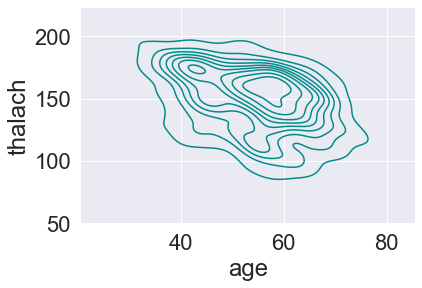

In [14]:
import seaborn as sns
sns.kdeplot(x = 'age', y = 'thalach', data = data, color = 'darkcyan')

In [15]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

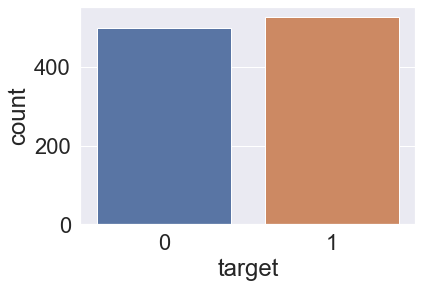

In [16]:
sns.countplot(x='target', data=data)

In [17]:
data['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

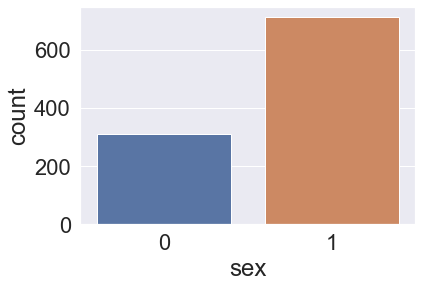

In [18]:
sns.countplot(x='sex', data=data)
plt.show()

In [19]:
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

<AxesSubplot:ylabel='count'>

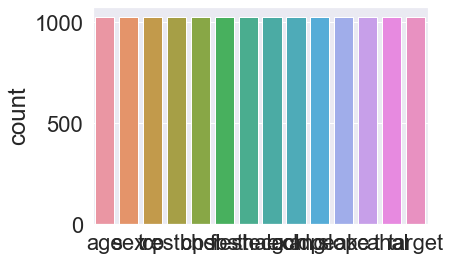

In [20]:
import seaborn as sns
sns.countplot(data=data)

<AxesSubplot:ylabel='count'>

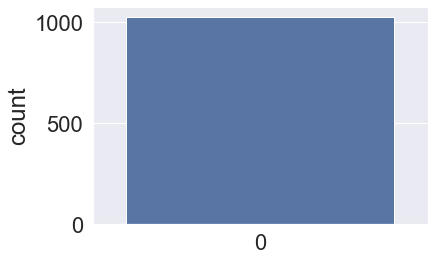

In [21]:
sns.countplot(data=data['target'])

In [22]:
x = data.drop('target',axis=1)
y = data['target']

In [23]:
print(x.shape)
print(y.shape)

(1025, 13)
(1025,)


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(820, 13)
(205, 13)
(820,)
(205,)


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
DT =  DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"Decision tree accuracy score is: {acc}")

Decision tree accuracy score is: 100.0


In [32]:
input_data = (52,1,0,125,212,0,1,168,0,1,2,2,3)

input_data_as_numpy_array= np.asarray(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = DT.predict(input_data_reshape)

print(prediction)


if (prediction[0]==0):
    print("the person does not have a Heart Disease")
else:
        print("the person has Heart Disease")

[0]
the person does not have a Heart Disease


C:\Users\HD\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[[103   0]
 [  3  99]]


<AxesSubplot:>

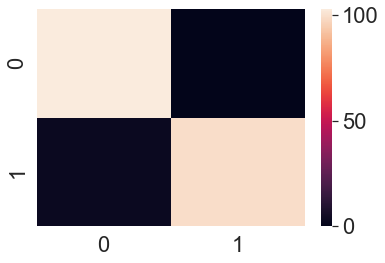

In [29]:
import pandas as pd
import seaborn as sns
data = pd.read_csv("heart.csv")
x = data.drop('target',axis=1)
y = data['target']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5)
from sklearn.tree import DecisionTreeClassifier
DT =  DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)
from sklearn.metrics import confusion_matrix as cm
conf = cm(y_test, y_pred)
print(conf)
sns.heatmap(conf)